Import MIRACL-VC1 Dataset (needs os, cv2)

In [1]:
from MiraclVc1 import MiraclVc1 as mcv

person_object = mcv.load_dataset("words", "MIRACL-VC1")

Perform F01 1/15
Perform F02 2/15
Perform F04 3/15
Perform F05 4/15
Perform F06 5/15
Perform F07 6/15
Perform F08 7/15
Perform F09 8/15
Perform F10 9/15
Perform F11 10/15
Perform M01 11/15
Perform M02 12/15
Perform M04 13/15
Perform M07 14/15
Perform M08 15/15


In [118]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import cv2
from matplotlib import pyplot as plt

"\nfor(mx, my, mw, mh) in mouth_rects:\n    my = int(my - 0.25*mh)\n\n    plt.imshow(cv2.rectangle(gray, (mx, my), (mx+mw,my+mw), (255,0,0), 2))\n    roi_gray_mouth = gray[my:my+mh, mx:mx+mw]\n    #plt.imshow(roi_gray_mouth, cmap='gray')\n"

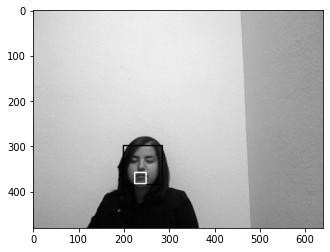

In [120]:

face_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_frontalface_default.xml')
mouth_cascade = cv2.CascadeClassifier('cascade_files/haarcascade_mcs_mouth.xml')

if mouth_cascade.empty():
  raise IOError('Unable to load the mouth cascade classifier xml file')


img_path = "MIRACL-VC1/F01/words/01/01/color_001.jpg"

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray')

# Detect face
face_rects = face_cascade.detectMultiScale(gray, 1.1, 3)


for(x,y,w,h) in face_rects:
    cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255), 2)
    roi_gray = gray[y:y+h, x:x+w]
    #plt.imshow(roi_gray, cmap='gray')
    mouth_rects = mouth_cascade.detectMultiScale(roi_gray, 1.4, 9)

    for(mx, my, mw, mh) in mouth_rects:
        my = int(my - 0.25*mh)
        plt.imshow(cv2.rectangle(gray, (x+mx, y+my), (x+mx+mw,y+my+mw), (255,0,0), 2))
        roi_gray_mouth = gray[my:my+mh, mx:mx+mw]
        #plt.imshow(roi_gray, cmap='gray')

plt.imshow(gray, cmap='gray')
"""
for(mx, my, mw, mh) in mouth_rects:
    my = int(my - 0.25*mh)

    plt.imshow(cv2.rectangle(gray, (mx, my), (mx+mw,my+mw), (255,0,0), 2))
    roi_gray_mouth = gray[my:my+mh, mx:mx+mw]
    #plt.imshow(roi_gray_mouth, cmap='gray')
"""